# Name: Bibek Itani
# Course: Advanced Big Data and Data Mining (MSCS-634-M20) 
# Lab 2: Classification Using KNN and RNN Algorithms

# Load and Prepare Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Basic Exploration
print(f"Features: {wine.feature_names}")
print(f"Classes: {wine.target_names}")
print(f"Dataset shape: {X.shape}")

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 13)


# KNN Implementation

In [2]:
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"KNN Accuracy for k={k}: {acc:.4f}")

KNN Accuracy for k=1: 0.7778
KNN Accuracy for k=5: 0.7222
KNN Accuracy for k=11: 0.7500
KNN Accuracy for k=15: 0.7500
KNN Accuracy for k=21: 0.7778


# RNN Implementation

In [3]:
radii = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radii:
    # 'outlier_label' handles cases where no points are found within the radius
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"RNN Accuracy for radius={r}: {acc:.4f}")

RNN Accuracy for radius=350: 0.7500
RNN Accuracy for radius=400: 0.7222
RNN Accuracy for radius=450: 0.7222
RNN Accuracy for radius=500: 0.7222
RNN Accuracy for radius=550: 0.7222
RNN Accuracy for radius=600: 0.7222


# Visualization

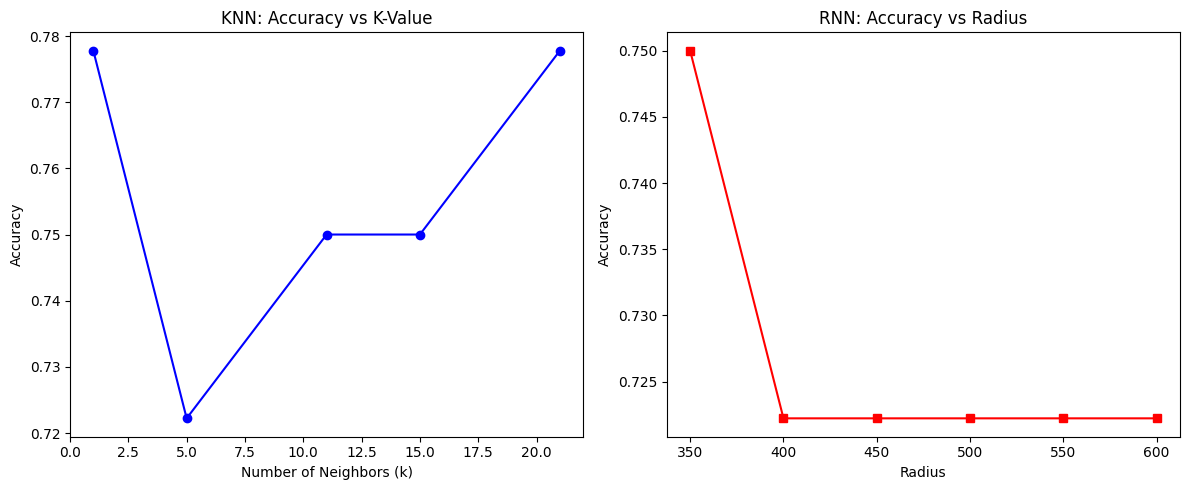

In [4]:
plt.figure(figsize=(12, 5))

# Plot KNN
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', color='b')
plt.title('KNN: Accuracy vs K-Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')

# Plot RNN
plt.subplot(1, 2, 2)
plt.plot(radii, rnn_accuracies, marker='s', color='r')
plt.title('RNN: Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()